In [2]:
import pandas as pd
import plotly.express as px
import aqi as aqi
import matplotlib.pyplot as plt
import ruptures as rpt

In [4]:
# read in data
data_file = "waqi-covid19-airqualitydata-2020.csv"
df_2020 = pd.read_csv(data_file)

df_2019Q4 = pd.read_csv("waqi-covid19-airqualitydata-2019Q4.csv")
df_2019Q3 = pd.read_csv("waqi-covid19-airqualitydata-2019Q3.csv")
df_2019Q2 = pd.read_csv("waqi-covid19-airqualitydata-2019Q2.csv")
df_2019Q1 = pd.read_csv("waqi-covid19-airqualitydata-2019Q1.csv")

# df_2019 = df_2019Q4.append(df_2019Q3)

df_2019_1 = df_2019Q4.append(df_2019Q3)
df_2019_2 = df_2019_1.append(df_2019Q2)
df_2019 = df_2019_2.append(df_2019Q1)

df_2020['Date'] = df_2020['Date'].astype('datetime64[ns]')
df_2019['Date'] = df_2019['Date'].astype('datetime64[ns]')

bad_species = ['wind gust', 'temperature', 'wind speed', 'wind-gust', 'pressure', 'dew', 'wind-speed',
       'humidity', 'precipitation', 'wd']
# good_species = ['pm25', 'pm10', 'no2', 'o3', 'so2', 'co']

df_2020 = df_2020[~df_2020.Specie.isin(bad_species)]
df_2019 = df_2019[~df_2019.Specie.isin(bad_species)]

# df_2020 = df_2020[df_2020.Specie.isin(good_species)]
# df_2019 = df_2019[df_2019.Specie.isin(good_species)]

df_combined = df_2020.append(df_2019)
df_combined.shape

(1318324, 9)

In [5]:
df_combined.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-03-01,AF,Kabul,pm25,24,74.0,284.0,142.0,25112.10
1,2020-03-26,AF,Kabul,pm25,24,34.0,164.0,78.0,9640.85
2,2020-01-03,AF,Kabul,pm25,24,104.0,497.0,170.0,112353.00
3,2020-01-26,AF,Kabul,pm25,24,59.0,258.0,119.0,18420.90
4,2020-02-05,AF,Kabul,pm25,24,107.0,253.0,149.0,17941.30


In [6]:
df_combined['Country'].unique()

array(['AF', 'BO', 'BR', 'CW', 'GB', 'GR', 'MO', 'AT', 'GT', 'IE', 'IN',
       'IS', 'MY', 'ZA', 'ML', 'SG', 'BG', 'BH', 'DK', 'IR', 'IT', 'MX',
       'TM', 'UG', 'CL', 'CY', 'PH', 'TH', 'CH', 'ET', 'HU', 'ID', 'NO',
       'SA', 'CR', 'DZ', 'GN', 'LT', 'RE', 'SK', 'BA', 'FI', 'FR', 'HR',
       'JO', 'KZ', 'LK', 'NZ', 'SE', 'TW', 'US', 'AU', 'CN', 'CO', 'CZ',
       'EC', 'IL', 'JP', 'LA', 'MN', 'RO', 'SV', 'KR', 'KW', 'MK', 'MM',
       'CI', 'DE', 'ES', 'KG', 'PR', 'PT', 'RS', 'UZ', 'VN', 'IQ', 'TJ',
       'AE', 'AR', 'BE', 'CA', 'EE', 'HK', 'PL', 'TR', 'XK', 'NP', 'UA',
       'BD', 'GE', 'GH', 'NL', 'PE', 'PK', 'RU'], dtype=object)

In [7]:
important_countries = ['US', 'SP', 'IT', 'FR', 'DE', 
                       'GB', 'TR', 'IR', 'CN', 'RU', 
                       'BR', 'BE', 'CA', 'NL', 'CH', 
                       'PT', 'IN', 'PE', 'IE', 'SE', 
                       'AT', 'IL', 'SA', 'JP', 'CL',
                       'KR', 'EC', 'PL', 'PK', 'MX']
df_combined =  df_combined[df_combined.Country.isin(important_countries)]
df_combined.shape

(957619, 9)

In [8]:
# df_combined.to_csv("airqualitydata-2019-2020.csv")

# Change Point

In [9]:
df_changepoints = None

In [10]:
df_combined[df_combined['Country']=="CN"]['City'].unique()

array(['Beijing', 'Jieyang', 'Kunming', 'Hangzhou', 'Chongqing',
       'Qingdao', 'Haikou', 'Ürümqi', 'Qiqihar', 'Guiyang', 'Shenzhen',
       'Yunfu', 'Xuchang', 'Yinchuan', 'Shenyang', 'Lhasa', 'Shanghai',
       'Changchun', 'Foshan', 'Nanning', 'Fushun', 'Hefei', 'Chengdu',
       'Hohhot', 'Qinhuangdao', 'Shijiazhuang', 'Shantou', 'Zhengzhou',
       'Nanjing', 'Xining', 'Xi’an', 'Zhuzhou', 'Wuhan', 'Tianjin',
       'Changzhou', 'Nanchang', 'Shiyan', 'Xinxiang', 'Suzhou', 'Harbin',
       'Lanzhou', 'Jinan', 'Changsha', 'Hegang', 'Anyang', 'Wuxi',
       'Taiyuan', 'Guangzhou', 'Fuzhou', 'Ningbo', 'Xiamen', 'Dongguan'],
      dtype=object)

In [11]:
unique_cities = df_combined['City'].unique()
unique_species = df_combined['Specie'].unique()

In [12]:
df_test = df_combined[(df_combined['City']=='Beijing') & (df_combined['Specie'] == 'no2')].sort_values(by=['Date'])

In [13]:
for c in unique_cities:
    print(c)
    df_city = df_combined[df_combined['City']==c]
    city_species = df_city['Specie'].unique()
    for s in unique_species:
        if s in city_species:
            try:
                df_test = df_city[(df_city['Specie'] == s)].reset_index(drop=True).sort_values(by=['Date'])
                signal = df_test['median'].to_numpy()
                algo = rpt.Pelt(model="rbf").fit(signal)
                result = algo.predict(pen=10)
                df_res= df_test.iloc[result[:-1],]
                if df_changepoints is not None:
                    df_changepoints = df_changepoints.append(df_res)
                else:
                    df_changepoints = df_res
            except Exception as e:
                print(e, c,s)
        

São José dos Campos
Vitória
São Paulo
Edinburgh
Norwich
Liverpool
Belfast
Coventry
Leeds
Cardiff
Bristol
London
Birmingham
Sheffield
Newport
Leicester
Manchester
Reading
Plymouth
Glasgow
Preston
Swansea
Southend-on-Sea
Salzburg
Linz
Innsbruck
Vienna
Graz
Dublin
Thrissur
New Delhi
Hyderabad
Delhi
Chandigarh
Bhopal
Nagpur
Lucknow
Ghāziābād
Hāpur
Gandhinagar
Chennai
Nashik
Mysore
Visakhapatnam
Mumbai
Jaipur
Patna
Muzaffarnagar
Thiruvananthapuram
Bengaluru
Shillong
Kolkata
Isfahan
Arāk
Karaj
Qom
Orūmīyeh
Yazd
Īlām
Kerman
Khorramshahr
Tabriz
Bandar Abbas
Sanandaj
Kermanshah
Khorramabad
Shiraz
Zanjān
Mashhad
Tehran
Bologna
Livorno
Trieste
Modena
Prato
Florence
Naples
Rome
Turin
Milan
Brescia
Parma
Ecatepec de Morelos
Guadalajara
Cuernavaca
Puebla
Mexico City
Morelia
Mérida
San Luis Potosí
Monterrey
Pachuca de Soto
Tepic
Toluca
Aguascalientes
Oaxaca
Rancagua
Osorno
Los Ángeles
Chillán
Calama
Puerto Montt
Valparaíso
Quilpué
Santiago
Talca
Concepción
Temuco
Zürich
Riyadh
Jeddah
Abha
Dammam
Ha'i

In [14]:
df_changepoints = df_changepoints.reset_index(drop=True)
df_changepoints.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-11-07,BR,São José dos Campos,pm10,93,1.0,39.0,10.0,1028.54
1,2019-01-25,BR,São José dos Campos,so2,52,0.6,12.2,2.1,43.34
2,2019-04-28,BR,São José dos Campos,so2,40,0.6,2.6,2.1,3.46
3,2019-11-09,BR,São José dos Campos,so2,4,0.6,1.1,0.6,0.62
4,2019-11-07,BR,São José dos Campos,pm25,90,5.0,91.0,17.0,6786.81


In [15]:
df_final = df_changepoints[df_changepoints['Date']>'2020']
df_final.shape

(833, 9)

In [18]:
df_final=df_final[['City','Country','Date','Specie']]
df_final = df_final.drop_duplicates()
df_final

,City,Country,Date,Specie
6,São José dos Campos,BR,2020-01-02,o3
11,Vitória,BR,2020-02-10,so2
17,São Paulo,BR,2020-02-23,co
22,Edinburgh,GB,2020-02-10,o3
24,Edinburgh,GB,2020-03-26,no2
...,...,...,...,...
3795,Lahore,PK,2020-01-29,pm25
3796,Chelyabinsk,RU,2020-02-25,o3
3797,Chelyabinsk,RU,2020-03-21,no2
3798,Saint Petersburg,RU,2020-03-11,o3


In [19]:
# df_final.to_csv("changepoints.csv")
list(df_final[(df_final['City']=="Manhattan")&(df_final['Specie']=="o3")]['Date'].apply(str))

['2020-02-25 00:00:00']

count    39.000000
mean     20.230769
std      13.976412
min       1.000000
25%      11.000000
50%      18.000000
75%      31.000000
max      57.000000
Name: Difference, dtype: float64
(180, 24)
(71, 24)
(39, 24)


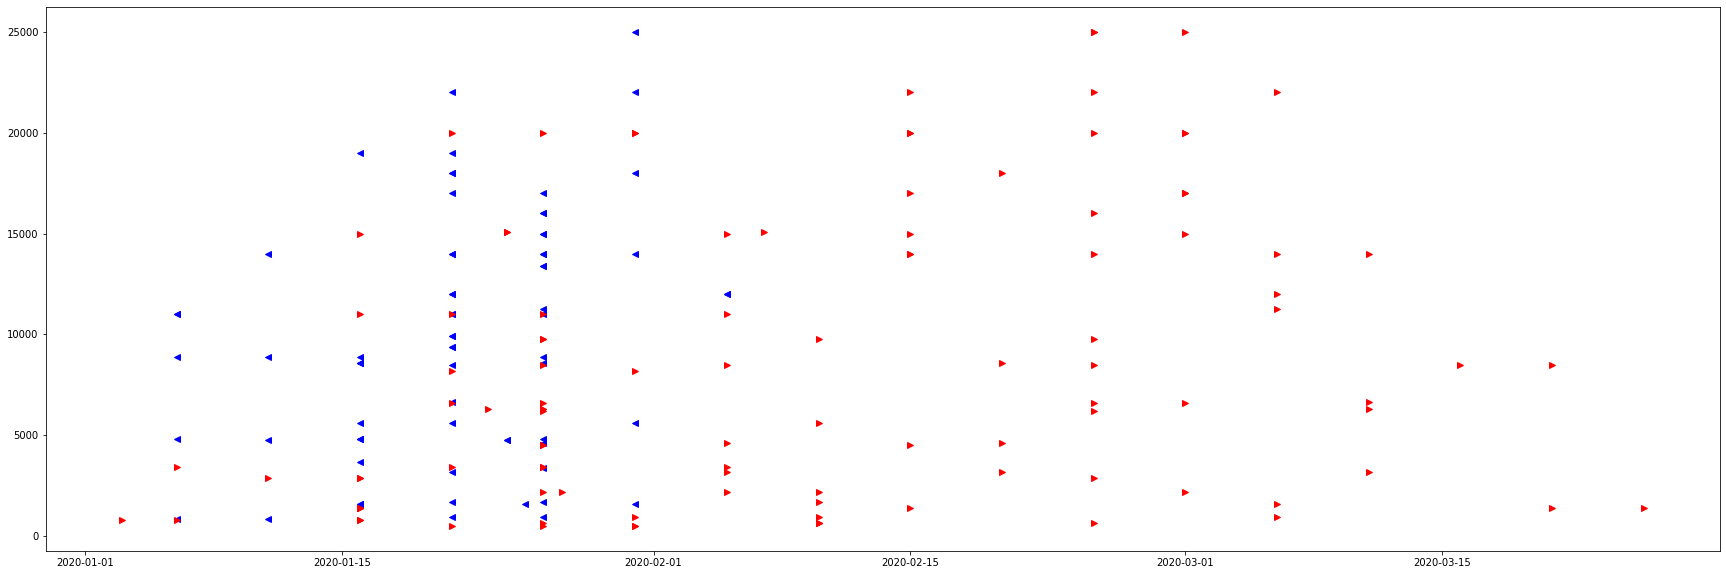

In [205]:
import numpy as np

df_pop = pd.read_csv('COVID-19-data-pop.csv')
df_pop['Lockdown Date'] = df_pop['Lockdown date'].astype('datetime64[ns]')

# df_final_pop = df_final[(df_final['Country'] == 'US') | (df_final['Country'] == 'CN')]
# df_final_pop = df_final[df_final['Country'] == 'US']
# df_final_pop = df_final_pop[df_final_pop['City'] != 'Manhattan']
df_china = df_final[(df_final['Country'] == 'CN')]

df_china = pd.merge(df_china, df_pop, on = "City", how = "inner")
df_china.rename(columns={'Population density (city)':'Population Density'}, inplace=True)

def compute_color(row):
    blue = 'b'
    red = 'r'
    return blue if row['Date'] <= row['Lockdown Date'] else red
    
df_china['Color'] = df_china.apply(compute_color, axis = 1)

df_china = df_china[df_china['Population Density'] < 1000000]

def days_difference(row):
    diff = row['Date'] - row['Lockdown Date']
    return diff.days

df_china['Difference'] = df_china.apply(days_difference, axis=1)

print(df_china.loc[df_china['Difference'] > 0]['Difference'].describe())

print(df_china.shape)
print(df_china.loc[df_china['Date'] <= df_china['Lockdown Date']].shape)
print(df_china.loc[df_china['Date'] > df_china['Lockdown Date']].shape)
# print(df_final_pop.shape)
# col = np.where(df_final_pop['Date'] <= df_final_pop['Lockdown Date'], 'b', 'r')
# print(col.shape)

# print(df_final_pop.groupby('Color').head())

fig, ax1 = plt.subplots(figsize=(30,10))
i = 0
for pcolor, gp in df_china.groupby('Color'):
    if pcolor == 'b':
        ax1.plot_date(gp['Date'], gp['Population Density'], c=pcolor, fmt='<')
    if pcolor == 'r':
        ax1.plot_date(gp['Date'], gp['Population Density'], c=pcolor, fmt='>')
# plt.plot_date(df_final_pop['Date'], df_final_pop['Population Density'], c = df_final_pop['Color'], xdate=True, ydate=False)

# AQI

In [ ]:
df = df_combined

In [ ]:
df.shape

In [ ]:
# for purpose of using aqi package
d = {}
d['pm25'] = aqi.POLLUTANT_PM25
d['pm10'] = aqi.POLLUTANT_PM10
d['no2'] = aqi.POLLUTANT_NO2_1H
d['o3'] = aqi.POLLUTANT_O3_8H
d['so2'] = aqi.POLLUTANT_SO2_1H
d['co'] = aqi.POLLUTANT_CO_8H

df = df.drop(df[(df['Specie'] == 'co') & (df['median'] == 58.0)].index)

In [ ]:
def compute_iaqi(row):
    if(row['Specie'] == 'o3'):
        row['median']/= 1000
    return aqi.to_iaqi(d[row['Specie']], row['median'], algo=aqi.ALGO_EPA)
df['iaqi'] = df.apply(compute_iaqi,axis=1)

In [ ]:
# take max to get final AQI 
df.sort_values(by=['City','Date'])

df_new = df.drop(['Country','Specie','count','min','max','median','variance'], axis = 1)
df_new = df_new.groupby(['Date','City']).max()

print(type(df_new.axes[1]))
def AQI(row):
    #print(df_new.loc[(row['Date'],row['City'])]["iaqi"])
    return df_new.loc[(row['Date'],row['City'])]["iaqi"]

df['AQI'] = df.apply(AQI,axis=1)

In [ ]:
df = df.sort_values(by=['City','Date'])
print(df['City'].unique())

In [ ]:
### City -> County 

d_tocounty = {}
d_tocounty['Albuquerque'] = 'Bernalillo'
d_tocounty['Atlanta'] = 'Fulton'

In [ ]:
# COVID data: confirmed 
df_confirmed = pd.read_csv("time_series_covid19_confirmed_US.csv")
df_confirmed.head()

In [ ]:
df_confirmed = df_confirmed.drop(['UID','iso2','iso3','code3','FIPS'],axis=1)
df_confirmed = df_confirmed.dropna()